{'11': 1}


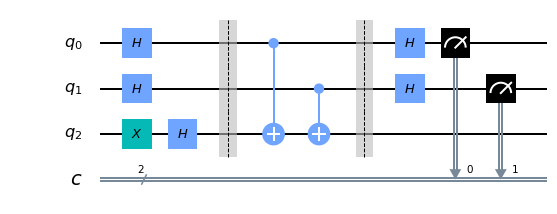

In [24]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
secretnumber = '11'
circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber))
circuit.x(len(secretnumber))
circuit.h(range(len(secretnumber)+1))
circuit.barrier()

for ii,yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii,len(secretnumber))
        
circuit.barrier()
circuit.h(range(len(secretnumber)))
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))
sim = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = sim, shots = 1).result()
counts = result.get_counts()
print(counts)
circuit.draw(output='mpl')